## Sentiment Analysis of Restarent Reviews

Import required libraries


In [1]:
import numpy as np       #linear algebra
import pandas as pd      #data processing ,csv file I/o

Exploratory Data Analysis

Load and prepare Data

In [2]:
#loading the data
df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')

In [3]:
df.shape

(1000, 2)

In [4]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [5]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

Data Preprocessing

In [7]:
#Importing essential libraries for performing natural language processing on restaurant review dataset

import nltk              #natural language toolkit,is a python package that you can use for NLP
import re            #python has inbuilt packagr called re, which can use to work with regular expressions
nltk.download('stopwords')   #the NLTK corpus is a massive dump of all kinds of natural language data sets that are definently worth taking a look at
from nltk.corpus import stopwords    #A stop is a commonly used word (such as "the","a","an","in") that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer   # Porters stemmer it is a stemmer which is mainly known for data mining and information retrival

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pranjal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#cleaning the reviews

corpus = []
for i in range(0,1000):

  #1000 records
  #cleaning special character from the reviews
  #the re.sub() method performs global search and global replace on the given data
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(df['Review'][i]))

    #convering the entire review into lowercase
    review = review.lower()

    #Tokenizing the review by words
    review_words = review.split()

    #removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]    #stopwords are the english wordswhich doesn't add much meaning to a sentence

      #streaming the stop words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    #joining the stemmed words
    review = ' '.join(review)

   #creating a corpus
    corpus.append(review)




In [9]:
corpus[0:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [10]:
#creating the bags of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)  #max_features = 1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

### **Split Data - (1000,1500)**
in this step, we are going to split data in two parts (training and testing),so that we can train our model on training dataset and test its accuracy on unseen test data

In [11]:
from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

#random_state simply sets seed to the random generator, so that your train-test splits are always deterministic. if you dont set seed, it is difficult to each time

#Training (1000,1500)
#1000 * 80/100 = 800
#1000 * 20/100 = 200


In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

**Takeaway Points**


*   Usually we take more and more data in training so its easy for the model to learn with more data



# Model Training
As we done with preprocessing part, it
is time to train our model.

**Multinomial Naive Bayes** - The algorithm is a probabilistic learning method that is mostly Used in Natural Language Processing(NLP).The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article

In [13]:
# Multinomial NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[73 24]
 [20 83]]


Accuracy is  78.0 %
Precision is  0.78
Recall is  0.81


Text(95.72222222222221, 0.5, 'Actual values')

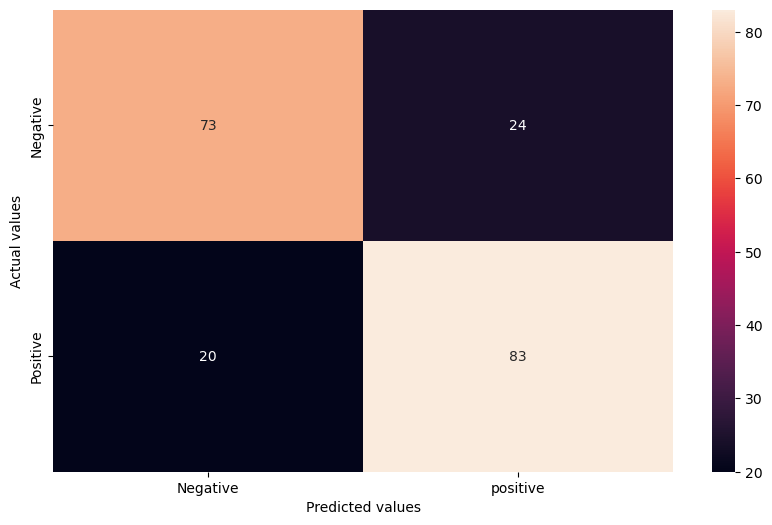

In [14]:
#plotting the confusion matrix

import matplotlib.pyplot as plt   #matplotlib is a low level graph plotting library in python that servs as a visualization utility
import seaborn as sns    #seaborn is python data visualization library based on matplotlib
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [15]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[73 24]
 [21 82]]


Accuracy is  77.5 %
Precision is  0.77
Recall is  0.8


In [16]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[75 22]
 [34 69]]


Accuracy is  72.0 %
Precision is  0.76
Recall is  0.67


# Predictions for the reviews

In [17]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review =sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [18]:
#Predicted values
sample_review = 'The food is very very good'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review


In [19]:
#Predicted values
sample_review = 'The food pretty bad and the service was very slow'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is Negative review!


In [20]:
#Predicted values
sample_review = 'The food was absolutely wonderful, from preparation to presentation,very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review
